# Regression analysis with control variables

*By Anders Sundell*

A major strength of regression analysis is that we can control relationships for alternative explanations. You've probably heard the expression "correlation is not causation." It means that just because we can see that two variables are related, one did not necessarily cause the other.

No statistical method can really *prove* that causality is present. However, we can make it more or less likely. And at the very least, we can investigate whether a relationship is spurious, that is, caused by other variables.

To take a simple example. Imagine that we want to investigate the effect of a persons height on running speed. For data we take all the times in the finals of the 100 meters in the Olympics 2016. We will then find that taller persons ran faster, on average. It is actually a quite strong relationship.

If this was a causal relationship - for instance because you can run faster if you have long legs - we could encourage tall youth to get into track and field.

But it would be unwise, without taking other relevant variables into account; variables that can affect both height and running speed. The obvious variable is gender. On average, men are taller than women, and they also have other physiological properties that make them run faster. If we don't account for the runners' gender, we would not pick that up.

To "control" for the varaible gender in principle means that we compare men with men, and women with women. What we are looking at is whether tall women run faster than short women, and whether tall men run faster than short men. And if we actually run this analysis (which I have!) we will see that no relationship between height and time remains. The relationship was spurious.

Had there been a relationship between height and speed even under control for gender, this would still not have implied that the relationship was causal, but it would at least have made it more less unlikely.

## A more relevant example: Democracy and life expectancy

Let's start by loading the data, which in this case is the QoG Basic dataset, with information about the world's countries. The unit of analysis is country, and information about the countries are stored in the variables. <a href="https://qog.pol.gu.se/data/datadownloads/qogbasicdata" target=_blank>The data can be downloaded here.</a>

In [3]:
use "qog_bas_cs_jan18.dta", clear

(Quality of Government Basic dataset 2018 - Cross-Section)


In the command, you need to write in the adress to the file on the computer, for instance "/Users/anders/data/qog_bas_cs_jan18.dta", otherwise it won't work.

The dataset has a lot of different variables. We are going to look at the relationship between democracy and life expectancy. Do people in more democratic countries live longer, and if so, is it *because* the countries are democratic, or is it due to something else? A causal interpretation would for instance be that the state takes better care of its citizens in democratic countries.

Our dependent variable is life expectancy, `wdi_lifexp`, and as our independent variable we use the degree of democracy, as measured by the Polity project, `p_polity2`. First, we look at some descriptive statistics by writing:

In [4]:
sum wdi_lifexp p_polity2


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  wdi_lifexp |        185    71.25413    8.138066   50.59105   83.58781
   p_polity2 |        165    4.072727    6.158044        -10         10


We can see that we have information about 185 countries, and that life expectancy (at birth) on average is 71.25 years. However, we only have information about democracy for 165 countries. Our analyses will only be based on the countries for which we have information on all variables.

The democracy variable runs from -10 (max dictatorship) to +10 (max democracy), with a mean value of 4.07.

Now it is time to do the first regression analysis, which we do by writing:

In [6]:
reg wdi_lifexp p_polity2


      Source |       SS           df       MS      Number of obs   =       164
-------------+----------------------------------   F(1, 162)       =     14.93
       Model |  961.395196         1  961.395196   Prob > F        =    0.0002
    Residual |  10432.0079       162  64.3951106   R-squared       =    0.0844
-------------+----------------------------------   Adj R-squared   =    0.0787
       Total |  11393.4031       163  69.8981786   Root MSE        =    8.0247

------------------------------------------------------------------------------
  wdi_lifexp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   p_polity2 |   .3942974   .1020468     3.86   0.000      .192784    .5958109
       _cons |   69.20107   .7498878    92.28   0.000     67.72025    70.68188
------------------------------------------------------------------------------


Here we can see a lot of interesting stuff, but the most important is the b-coefficient for the democracy variable, which we find in the column "Coef." It is 0.39, which means that for each step up we take on the democracy variable, life expectancy increases by 0.39 years. The relationship is statistically significant, which we see in the column "P>|t", since the p-value is below 0.050.

Up to the right, we see that "R-squared = 0.0844". This means that the variables in the model - only democracy in this case - explain 8.4% of the variation in the dependent variable. Not a lot, but something. We have no thresholds by which to judge whether the value is large or small - it completely depends on the context.

If we want to look at the relationship graphically, we write:

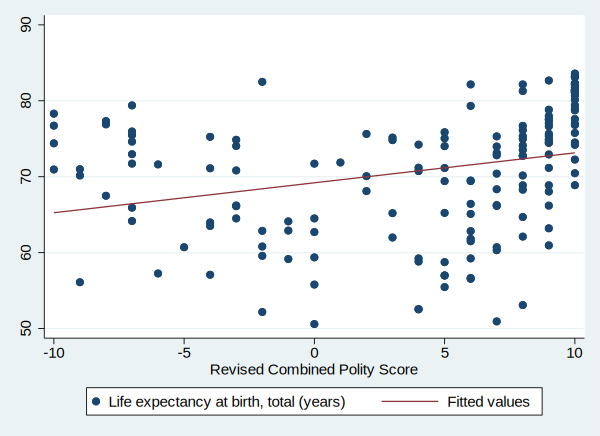

In [4]:
twoway (scatter wdi_lifexp p_polity2) (lfit wdi_lifexp p_polity2)

The red regression line slopes upward slightly, which the regression analysis also showed (the b-coefficient was positive). But we can also see that the line is not a great fit to the dots - there is considerable spread around the line. This explains the low R squared value.

But does this positive relationship mean that democracy causes life expectancy to increase. Not necessarily. There might be other factors that lead to both democracy and high life expectancy. Democracy and life expectancy might be two symptoms, rather than cause and effect.

An obvious suspect is the level of economic development. Democracy research shows that countries with more economic prosperity are more likely to both democratize and keep democracy, once attained. Richer countries can also invest more in health care and disease prevention, for instance through better water supply and waste management.

To test the hypothesis that democracy leads to longer life expectancy, we will control for economic development. A standard measure of that is GDP per capita:

In [14]:
sum gle_rgdpc


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
   gle_rgdpc |        192     12596.3     15803.7     285.95   95696.97


The variable `gle_rgdpc`shows a country's GDP per capita in US dollars. The mean is 12596, but the poorest country (Kongo-Kinshasa) only has a meager 286, while the richest (Monaco) has a whopping 95697.

To make sure that it is a relevant control variable, and that are assumptions are right, we look at the bivariate correlations between the control variable, democracy, and life expectancy. We do this by writing:

In [17]:
pwcorr gle_rgdpc p_polity2 wdi_lifexp


             | gle_rg~c p_poli~2 wdi_li~p
-------------+---------------------------
   gle_rgdpc |   1.0000 
   p_polity2 |   0.1512   1.0000 
  wdi_lifexp |   0.6329   0.2905   1.0000 


In this matrix we find three relationships, standardized according to the Pearson's R measure, which runs from -1 (perfect negative relationship) to +1 (perfect positive relationship), via 0 (no relationship). The relationship between democracy `p_polity2` and GDP `gle_rgdpc` is 0.15. More GDP per capita is associated with more democracy, and and more democracy is associated with more GDP. Democratic countries are thus richer, on average.

High GDP per capita is also associated with higher life expectancy. This relationship is very strong, 0.63, considerably more than the relationship between democracy and life expectancy (0.29).

When we control for variables that have a postive correlation with both the independent and the dependent variable, the original relationship will be pushed down, and become more negative. The same is true if we control for a variable that has a negative correlation with both independent and dependent. It is thus likely that the relationship between democracy and life expectancy will weaken under control for GDP per capita.

Conversely, if we control for a variable that has a positive correlation with the dependent, and a negative correlation with the independent, the original relationship will become more positive. The main relationship will also become more positive if we control for a variable that has a negative correlation with the dependent variable, and a positive correlation with the independent.

By running a regression analysis where both democracy and GDP per capita are included, we can, simply put, compare rich democracies with rich nondemocracies, and poor democracies with poor nondemocracies. This comparison is more fair. But will there remain a relationship between democracy and life expectancy?

When we run the analysis, we reuse the previouse regression command, we just add `gle_rgdpc`after `p_polity2`. If we want to add more variables, we just list them after. The order of the independent variables does not matter (but the dependent must always be first).

In [18]:
reg wdi_lifexp p_polity2 gle_rgdpc


      Source |       SS           df       MS      Number of obs   =       162
-------------+----------------------------------   F(2, 159)       =     67.06
       Model |  5087.66756         2  2543.83378   Prob > F        =    0.0000
    Residual |  6031.42779       159  37.9335081   R-squared       =    0.4576
-------------+----------------------------------   Adj R-squared   =    0.4507
       Total |  11119.0954       161  69.0627041   Root MSE        =     6.159

------------------------------------------------------------------------------
  wdi_lifexp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   p_polity2 |   .2590328   .0796837     3.25   0.001     .1016577    .4164078
   gle_rgdpc |   .0003713   .0000353    10.53   0.000     .0003017     .000441
       _cons |   65.53559   .6865968    95.45   0.000     64.17957    66.89162
--------------------------------------------------

What happened with the original relationship? The coefficient sank from 0.39 to 0.26. But it is still positive, and statistically significant (the p-value is lower than 0.05). But a part of the original association was due to the democratic countries on average being richer. When we hold the level of economic development constant, the relationship is no longer as clear.

The coefficient for GDP per capita is, as expected, positive. An increase of GDP per capita with one dollar (holding the level of democracy constant) is associated with an increase of life expectancy of 0.00037 years. It might not sound much, but neither is an increase of GDP per capita of one dollar. If we instead increase GDP per capita with 10,000 dollars, life expectancy would increase 3.7 years, which is substantial.

R2 also increased markedly compared to the model with only democracy in it. Together, democracy and GDP per capita explain 45.7% of the variation in the dependent variable. Primarily, it is due to the strong explanatory power of the GDP variable. People live much longer in richer countries.

The main conclusion is that a relationship between democracy and life expectancy remains. *This does however not imply that we now have showed that there is a causal effect.* There is still a lot of other relevant variables to control for, and in a thesis you should definitely do. But the principle is the same, we would only add more variables to the regression analysis.

## Conclusion

To prove that a relationship is causal is extremely hard. It is a shame, since proving causality is usually what we need in order to make recommendations, regardless if it is about health care or policy.

But regression analysis with control variables at the very least help us to avoid the most common pitfalls. In this example, we could see that the relationship between democracy and life expectancy not completely was due to democratic countries being richer, and non-democratic countries poorer. But by doing so, we have accounted for one alternative explanation for the original relationship.

It is however important to think through which control variables that should be included. The analysis is not better or more sofisticated just because more control variables are included. We should for example not control for variables that come after the independent variable in the causal chain. That is, if democracy causes something that in turn causes longer life expectancy, we should not control for it. To rule out alternative explanations we should only control for variables that come before both independent and dependent variables.

It might also be a good idea to run the analyses stepwise, adding one control variable at a time, to see how the main relationship changes. This helps us to get a better sense of what is going on, and to think theoretically about. How we eventually present the results for a wider audience is another question, and we might not then need to show all the steps.